Regression results:                             OLS Regression Results                            
Dep. Variable:            #Passengers   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     828.2
Date:                Tue, 11 Mar 2025   Prob (F-statistic):           4.02e-61
Time:                        11:39:07   Log-Likelihood:                -754.82
No. Observations:                 144   AIC:                             1514.
Df Residuals:                     142   BIC:                             1520.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         87.6528      7.716

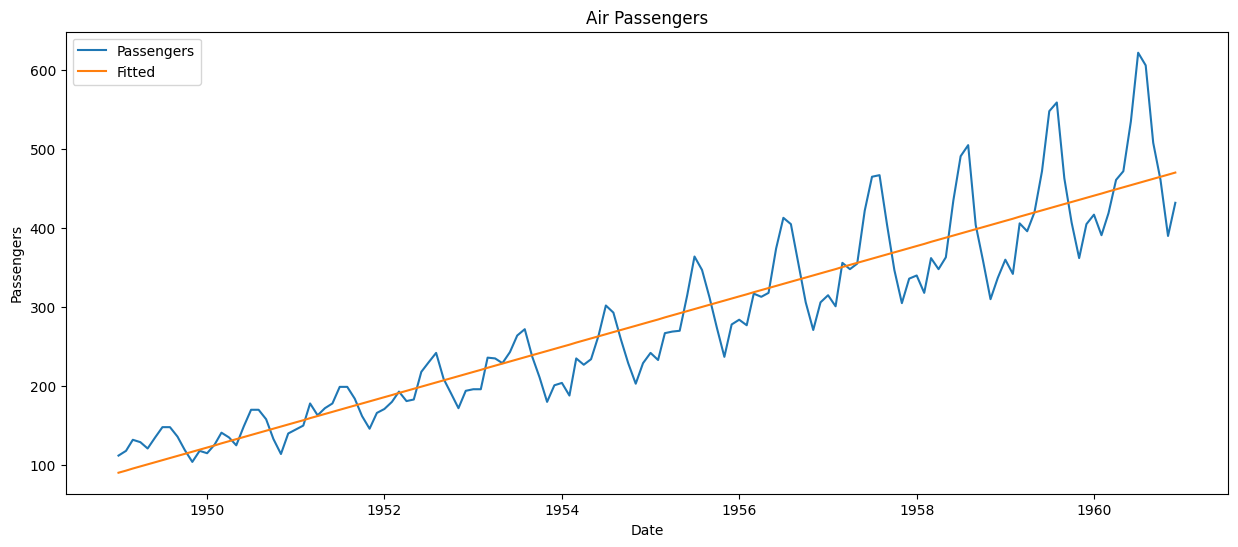

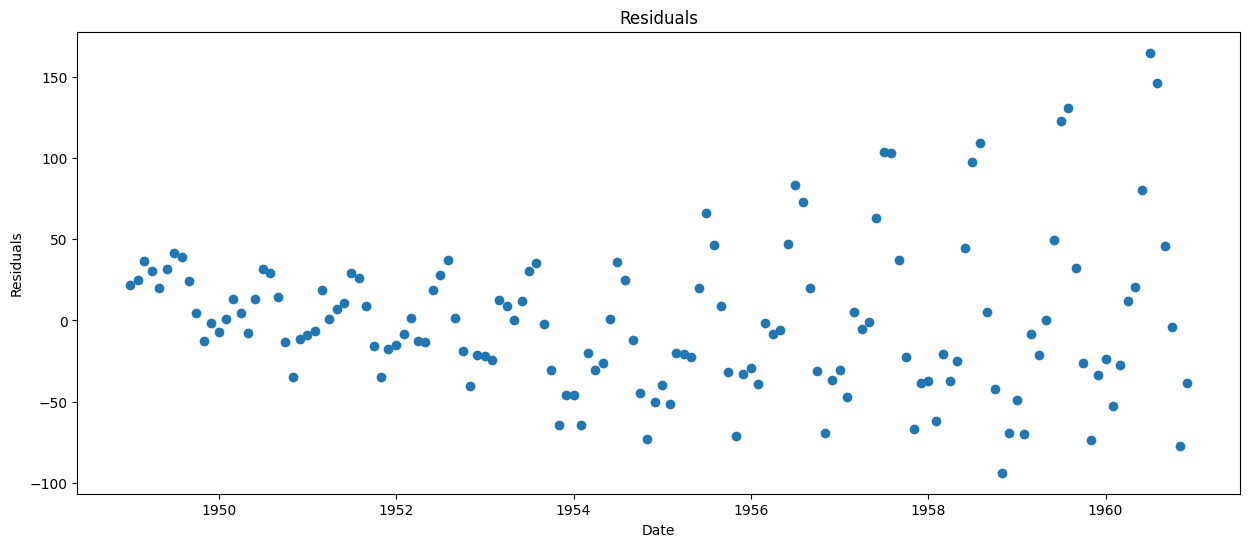

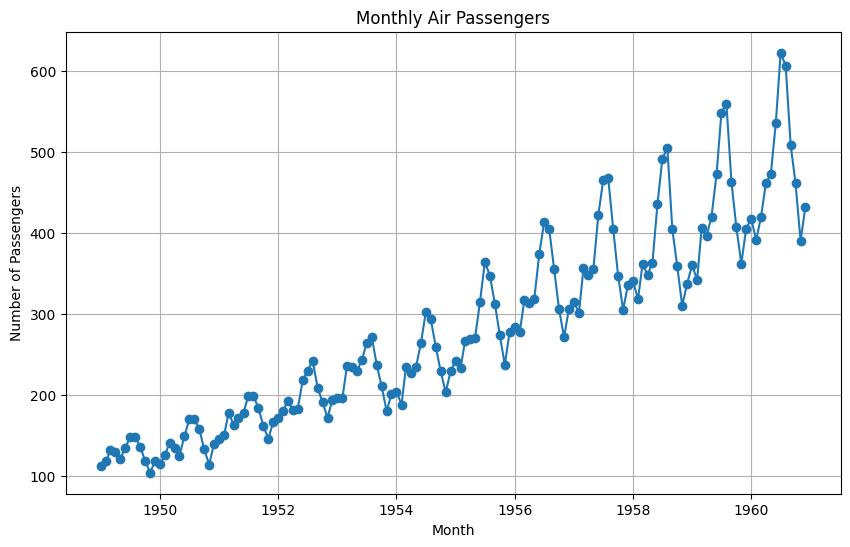

/Users/chen2636/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


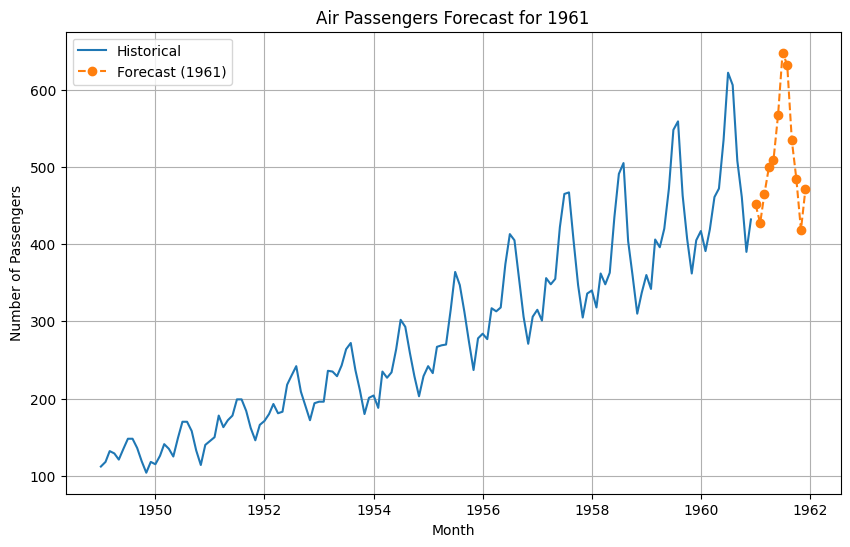

Forecast and historical data have been exported to '/Users/chen2636/Desktop/AAE625/HW3/AirPassengers_with_forecast.csv'.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.api as sm

Dir = "/Users/chen2636/Documents/GitHub/AAE625_25/Untitled"

df = pd.read_csv(f'{Dir}/AirPassengers.csv', parse_dates=['Month'], index_col='Month')

df['T'] = np.arange(len(df))+1

X = df['T']
y = df['#Passengers']
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print('Regression results:',results.summary())

df['Fitted'] = results.fittedvalues
plt.figure(figsize=(15,6))
plt.plot(df.index,df['#Passengers'], label='Passengers')
plt.plot(df.index,df['Fitted'], label='Fitted')
plt.title('Air Passengers')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

df['Residuals'] = results.resid
plt.figure(figsize=(15,6))
plt.scatter(df.index,df['Residuals'])
plt.title('Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['#Passengers'], marker='o')
plt.title("Monthly Air Passengers")
plt.xlabel("Month")
plt.ylabel("Number of Passengers")
plt.grid(True)
plt.show()

model = ExponentialSmoothing(df['#Passengers'], trend='add', seasonal='add', seasonal_periods=12)
fit = model.fit(optimized=True)

forecast = fit.forecast(12)

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['#Passengers'], label='Historical')
plt.plot(forecast.index, forecast, label='Forecast (1961)', marker='o', linestyle='--')
plt.title("Air Passengers Forecast for 1961")
plt.xlabel("Month")
plt.ylabel("Number of Passengers")
plt.legend()
plt.grid(True)
plt.show()

forecast_df = pd.DataFrame({'#Passengers': forecast})
combined = pd.concat([df, forecast_df])

output_dir = "/Users/chen2636/Desktop/AAE625/HW3"
combined.to_csv(f'{output_dir}/AirPassengers_with_forecast.csv')

print(f"Forecast and historical data have been exported to '{output_dir}/AirPassengers_with_forecast.csv'.")
